In [8]:
import numpy as np
from random import randint

def mult_matrix(m1, m2):
    temp = []
    m3 = []
    if len(m1[0]) != len(m2):
        print("Матрицы нельзя перемножить")
    else:
        r1 = len(m1)
        c1 = len(m1[0])
        r2 = c1
        c2 = len(m2[0])
        for i in range(r1):
            for j in range(c2):
                sum = 0
                for k in range(c1):
                    sum += m1[i][k] * m2[k][j]
                temp.append(sum)
            m3.append(temp)
            temp = []
    return m3
            
    
def create_matrix(m, n):
    a = []
    b = []
    for i in range(m):
        for j in range(n):
            b.append(random.randint(1,10))
        a.append(b)
        b = []
    return a

def output(matrix):
    for i in matrix:
        print(i)
    

m1 = create_matrix(3, 4)
m2 = create_matrix(4, 2)           

print('1 матрица: ')
print(np.array(m1))
print('2 матрица: ')
print(np.array(m2))
print('Произведение матриц: ')
output(mult_matrix(m1, m2))
print('Произведение матриц с помощью numpy: ')
print(np.matrix(m1)*np.matrix(m2))


1 матрица: 
[[2 3 2 7]
 [5 8 5 6]
 [8 7 2 5]]
2 матрица: 
[[8 2]
 [2 2]
 [2 1]
 [5 9]]
Произведение матриц: 
[61, 75]
[96, 85]
[107, 77]
Произведение матриц с помощью numpy: 
[[ 61  75]
 [ 96  85]
 [107  77]]


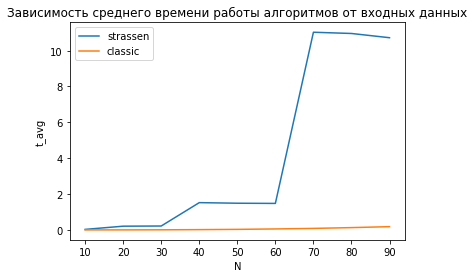

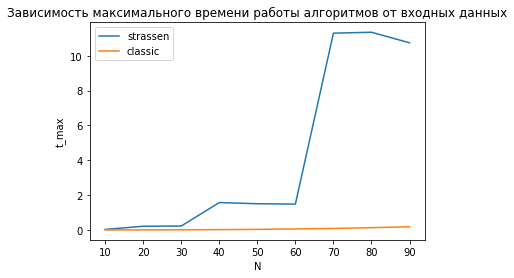

In [22]:
from math import ceil, log
import time
import matplotlib.pyplot as plt

def ikj_matrix_product(A, B):
    n = len(A)
    C = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for k in range(n):
            for j in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C


def add(A, B):
    n = len(A)
    C = [[0 for j in range(0, n)] for i in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] + B[i][j]
    return C


def subtract(A, B):
    n = len(A)
    C = [[0 for j in range(0, n)] for i in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] - B[i][j]
    return C


def strassenR(A, B):
    """
    Implementation of the strassen algorithm, similar to
    http://en.wikipedia.org/w/index.php?title=Strassen_algorithm&oldid=498910018#Source_code_of_the_Strassen_algorithm_in_C_language
    """
    n = len(A)

    if n == 1:
        return ikj_matrix_product(A, B)
    else:
        # initializing the new sub-matrices
        new_size = n // 2
        a11 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        a12 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        a21 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        a22 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]

        b11 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        b12 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        b21 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        b22 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]

        aResult = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        bResult = [[0 for j in range(0, new_size)] for i in range(0, new_size)]

        # dividing the matrices in 4 sub-matrices:
        for i in range(0, new_size):
            for j in range(0, new_size):
                a11[i][j] = A[i][j]  # top left
                a12[i][j] = A[i][j + new_size]  # top right
                a21[i][j] = A[i + new_size][j]  # bottom left
                a22[i][j] = A[i + new_size][j + new_size]  # bottom right

                b11[i][j] = B[i][j]  # top left
                b12[i][j] = B[i][j + new_size]  # top right
                b21[i][j] = B[i + new_size][j]  # bottom left
                b22[i][j] = B[i + new_size][j + new_size]  # bottom right

        # Calculating p1 to p7:
        aResult = add(a11, a22)
        bResult = add(b11, b22)
        p1 = strassenR(aResult, bResult)  # p1 = (a11+a22) * (b11+b22)

        aResult = add(a21, a22)  # a21 + a22
        p2 = strassenR(aResult, b11)  # p2 = (a21+a22) * (b11)

        bResult = subtract(b12, b22)  # b12 - b22
        p3 = strassenR(a11, bResult)  # p3 = (a11) * (b12 - b22)

        bResult = subtract(b21, b11)  # b21 - b11
        p4 = strassenR(a22, bResult)  # p4 = (a22) * (b21 - b11)

        aResult = add(a11, a12)  # a11 + a12
        p5 = strassenR(aResult, b22)  # p5 = (a11+a12) * (b22)

        aResult = subtract(a21, a11)  # a21 - a11
        bResult = add(b11, b12)  # b11 + b12
        p6 = strassenR(aResult, bResult)  # p6 = (a21-a11) * (b11+b12)

        aResult = subtract(a12, a22)  # a12 - a22
        bResult = add(b21, b22)  # b21 + b22
        p7 = strassenR(aResult, bResult)  # p7 = (a12-a22) * (b21+b22)

        # calculating c21, c21, c11 e c22:
        c12 = add(p3, p5)  # c12 = p3 + p5
        c21 = add(p2, p4)  # c21 = p2 + p4

        aResult = add(p1, p4)  # p1 + p4
        bResult = add(aResult, p7)  # p1 + p4 + p7
        c11 = subtract(bResult, p5)  # c11 = p1 + p4 - p5 + p7

        aResult = add(p1, p3)  # p1 + p3
        bResult = add(aResult, p6)  # p1 + p3 + p6
        c22 = subtract(bResult, p2)  # c22 = p1 + p3 - p2 + p6

        # Grouping the results obtained in a single matrix:
        C = [[0 for j in range(0, n)] for i in range(0, n)]
        for i in range(0, new_size):
            for j in range(0, new_size):
                C[i][j] = c11[i][j]
                C[i][j + new_size] = c12[i][j]
                C[i + new_size][j] = c21[i][j]
                C[i + new_size][j + new_size] = c22[i][j]
        return C


def strassen(A, B):
    assert type(A) == list and type(B) == list
    assert len(A) == len(A[0]) == len(B) == len(B[0])

    # Make the matrices bigger so that you can apply the strassen
    # algorithm recursively without having to deal with odd
    # matrix sizes
    nextPowerOfTwo = lambda n: 2 ** int(ceil(log(n, 2)))
    n = len(A)
    m = nextPowerOfTwo(n)
    APrep = [[0 for i in range(m)] for j in range(m)]
    BPrep = [[0 for i in range(m)] for j in range(m)]
    for i in range(n):
        for j in range(n):
            APrep[i][j] = A[i][j]
            BPrep[i][j] = B[i][j]
    CPrep = strassenR(APrep, BPrep)
    C = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = CPrep[i][j]
    return C



x = np.arange(10,100,10)
N = 2
y1_avg = []
y1_max = []
y2_avg = []
y2_max = []
for n in x:
    total_time1 = 0
    max_time1 = 0
    total_time2 = 0
    max_time2 = 0
    for i in range(N):
        A = create_matrix(n,n)
        B = create_matrix(n,n)

        start_time = time.time()
        C = strassen(A, B)
        end_time = time.time()
        alg_time1 = end_time - start_time 
        total_time1 += alg_time1 
        max_time1 = max(max_time1, alg_time1)

        start_time = time.time()
        D = ikj_matrix_product(A, B)
        end_time = time.time()
        alg_time2 = end_time - start_time 
        total_time2 += alg_time2 
        max_time2 = max(max_time2, alg_time2)
    y1_avg.append(total_time1/N)
    y1_max.append(max_time1)
    y2_avg.append(total_time2/N)
    y2_max.append(max_time2)
    
fig1 = plt.figure()
plt.plot(x,y1_avg,label='strassen') 
plt.plot(x,y2_avg,label='classic')
plt.title("Зависимость среднего времени работы алгоритмов от входных данных") 
plt.xlabel("N")
plt.ylabel("t_avg")
plt.legend() 

fig2 = plt.figure()
plt.plot(x,y1_max,label='strassen') 
plt.plot(x,y2_max,label='classic')
plt.title("Зависимость максимального времени работы алгоритмов от входных данных")
plt.xlabel("N")
plt.ylabel("t_max")
plt.legend() 